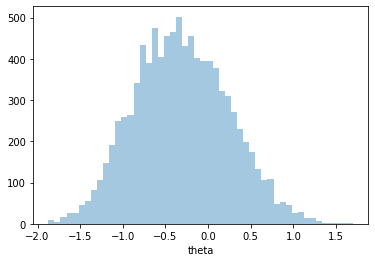

-0.3121117003001753
The 95% credible set is  -1.3909491813227262 0.7667257807223756


In [54]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

data = np.array([-2, -3, 4, -7,0,4])
theta = 1 # initial value
thetas = [theta]

def sum_theta(data, theta):
    total = 0
    for i in data:
        c = i - theta
        total += c**2/8
    return total

for i in range(10000):
    theta_prop = np.random.uniform(-2,2)
    prod_1 = np.exp(-sum_theta(data, theta_prop))
    prod_2 = np.exp(-sum_theta(data, theta))
    
    r = ((1+np.cos(np.pi*theta_prop/2))/2*prod_1)/((1+np.cos(np.pi*theta/2))/2*prod_2)
    
    rho = np.amin([r,1])
    z = np.random.uniform()
    if rho > z:
        theta = theta_prop
    thetas.append(theta)

    
thetas = thetas[501:]
sns.distplot(thetas, kde = False, axlabel ="theta")
plt.show()

B_estimator = np.mean(thetas)
print (B_estimator)

var = np.var(thetas)

ubl = B_estimator + 1.96*np.sqrt(var)
lbl = B_estimator - 1.96*np.sqrt(var)

print ("The 95% credible set is ",lbl,ubl)